## <center>5. Feladatsor</center>

<img src="magic.gif" width="870">

<center>

## <center>Kétpontos peremérték problémák 1D-ben </center>

<br>

### Direkt diszkretizációs technikák
#### Dirichlet-perem


<b>1.feladat.</b> Tekintsük az alábbi kétpontos peremérték problémát

\begin{cases}
-u''(x)=1,\quad x\in(0,\pi/4)\\
u(0)=1\\
u(\pi/4)=2
\end{cases}

(a) Alkalmazzuk a fenti feladatban szereplő második deriváltra a standard másodrendű véges differenciát! Készítsünk ábrát az általunk kapott numerikus megoldásról és a feladat pontos megoldásáról is!

<br>


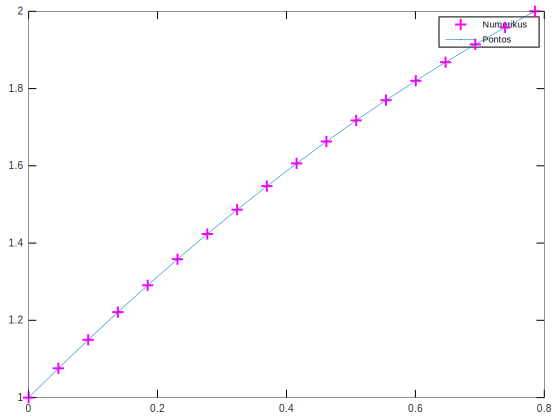

In [16]:
a = 0; b = pi/4; %intervallum
alpha = 1; beta = 2; %peremertek
N = 16; 
h = (b-a)/(N+1);
e = ones(N+2,1);

% A_h_hullam
A_h_tilde = (1/h^2)*spdiags([-e 2*e -e], [-1 0 1], N+2, N+2);
A_h_tilde(1,1) = 1; A_h_tilde(1,2) = 0;
A_h_tilde(N+2,N+1) = 0; A_h_tilde(N+2,N+2) = 1;

% f_hullam jobboldal
f = ones(N+2,1);
f_hullam = f;
f_hullam(1) = alpha;
f_hullam(N+2) = beta;

% Megoldalni a LAER-t
y_hullam = A_h_tilde\f_hullam;
x = linspace(a,b,N+2)';
exact = -0.5*x.^2+(4/pi+pi/8)*x+1;

%Plot
plot(x,y_hullam,'m+',x,exact)
legend('Numerikus','Pontos')


<br>
(b) Módosítsuk az előzőleg megírt programunkat annak fényében, hogy a rendszer mérete redukálható a peremértékek jobboldali beépítésével! Mérjük a hibavektor maximum normáját! Mit tapasztalunk az intervallum számának növelésével?

<br>

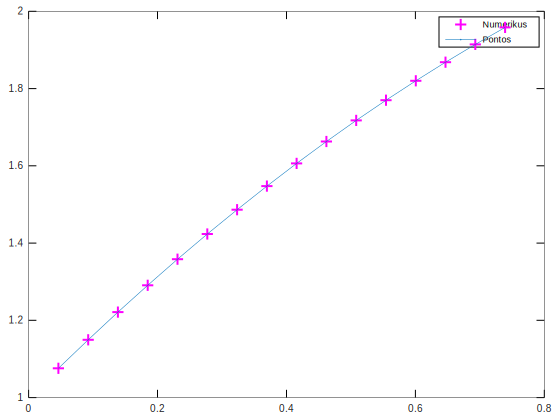

In [18]:
a = 0; b = pi/4; %intervallum
alpha = 1; beta = 2; %peremertek
N = 16; 
h = (b-a)/(N+1);
e = ones(N,1);

% A_h
A_h = (1/h^2)*spdiags([-e 2*e -e], [-1 0 1], N, N);

% f_hullam jobboldal
f = ones(N,1);
f_hullam = f;
f_hullam(1) = 1 + alpha/h^2;
f_hullam(N) = 1 + beta/h^2;

% Megoldalni a LAER-t
y = A_h\f_hullam;
x = linspace(a+h,b-h,N)';
exact = -0.5*x.^2+(4/pi+pi/8)*x+1;

%Plot
plot(x,y,'m+',x,exact)
legend('Numerikus','Pontos')



<b>2.feladat.</b> Tekintsük az alábbi kétpontos peremérték problémát

\begin{cases}
u''(x)-u(x)=0,\quad x\in(0,1)\\
u(0)=0\\
u(1)=1
\end{cases}

Alkalmazzuk az előző feladatban megismert redukált eljárást! Mérjük a hibát maximum, egyes és kettes normában! A pontos megoldás ismeretében adjunk becslést a konvergencia rendjére!<br>

In [22]:
a = 0; b = 1; %intervallum
alpha = 0; beta = 1; %peremertek
N = 16; 
h = (b-a)/(N+1);
e = ones(N+2,1);

%% u"-u=0
%% -u"+u=0

% A_h_hullam
A_h_tilde = (1/h^2)*spdiags([-e 2*e+h^2 -e], [-1 0 1], N+2, N+2);
A_h_tilde(1,1) = 1; A_h_tilde(1,2) = 0;
A_h_tilde(N+2,N+1) = 0; A_h_tilde(N+2,N+2) = 1;

% f_hullam jobboldal
f = zeros(N+2,1);
f_hullam = f;
f_hullam(1) = alpha;
f_hullam(N+2) = beta;

% Megoldalni a LAER-t
y_hullam = A_h_tilde\f_hullam;
x = linspace(a,b,N+2)';
exact = sinh(x)/sinh(1);

max_norma = norm(y_hullam-exact,'inf')

%% 2.feladat / a 
% Pontos mo ismeretében kettes normaval konvergencia rend becsles

max_norma =  0.000015294
ans =  0.000054216


In [24]:
0.000054216/0.000015294

ans =  3.5449


#### Neumann-perem

<br>

<b>3.feladat.</b> Tekintsük az alábbi problémát:

\begin{cases}
u''(x)=e^x,\quad x\in(0,1)\\
u'(0)=1\\
u(1)=e
\end{cases}

Alkalmazzuk a Neumann-perem közelítésére tanult 

(a) első<br>
$$
\frac{y_1-y_0}{h}=\alpha
$$
(b) második<br>
$$
\frac{y_1-y_0}{h}=\alpha+\frac{h}{2}f(x_0)
$$
(c) harmadik
$$
-\frac{\frac{3}{2}y_0-2y_1+\frac{1}{2}y_2}{h}=\alpha
$$

módszert teljes rendszer esetén! Mérjük a hibát maximum normában! A pontos megoldás ismeretében adjunk becslést a konvergencia rendjére!<br> 

#### Általános másodrendű lineáris kétpontos p.é.p. Dirichlet-peremmel


<b>4.feladat.</b> Tekintsük a másodrendű lineáris kétpontos peremérték-problémát

\begin{cases}
a(x)u''(x)+b(x)u'(x)+c(x)u(x)=f(x), x\in (a,b)&\\
u(a)=\alpha &\\
u(b)=\beta
\end{cases}

Másodrendű véges differenciás közelítést alkalmazva írjuk fel a teljes rendszer alakját!
<br>

5.feladat. Írjunk a fenti probléma teljes rendszer alakjához tartozó programot! Teszteljük programunkat a feladatsor bevezető példáin!


In [3]:
[h,x,y]=kpep(0,pi/4,1,2,64);
%plot(x,y)

maxnorma =    2.4425e-15


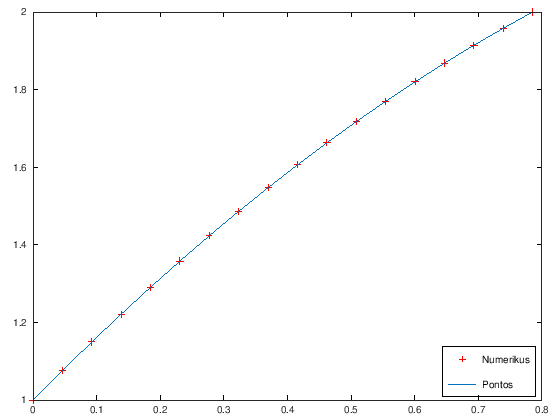

In [1]:
%Teszt1: 1.feladat.
%a=feval(@(x)(-e),x);
%b=feval(@(x)(nulla),x);
%c=feval(@(x)(nulla),x);
%f=feval(@(x)(e),x);
inta=0; intb=pi/4; alpha=1; beta=2; N=16;
[h,x,y]=kpep(inta,intb,alpha,beta,N);
exact=-0.5*x.^2+(4/pi+pi/8)*x+1;
plot(x,y,'r+',x,exact)
legend('Numerikus','Pontos','Location','southeast')
maxnorma=norm(y-exact,'inf')

rate =

   1.9148   1.9547



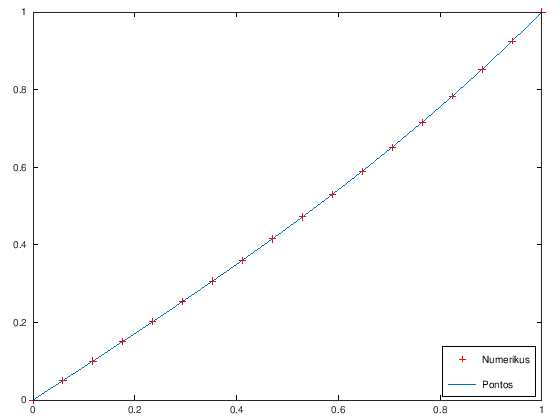

In [9]:
%Teszt2: 2.feladat.
%a=feval(@(x)(e),x);
%b=feval(@(x)(nulla),x);
%c=feval(@(x)(-e),x);
%f=feval(@(x)(nulla),x);
inta=0; intb=1; alpha=0; beta=1; N=16;
[h,x,y]=kpep(inta,intb,alpha,beta,N);
exact=sinh(x)/sinh(1);
plot(x,y,'r+',x,exact)
legend('Numerikus','Pontos','Location','southeast')
N=2^4;
for i=1:3
    [h,x,y]=kpep(inta,intb,alpha,beta,(N*2^(i-1)));
    exact=sinh(x)/sinh(1);
    norma2(i)=norm(y-exact,'inf');
end
for i=1:length(norma2)-1
    rate(i)=log2(norma2(i)/norma2(i+1));
end
rate

In [1]:
% Teszt3: 3.feladat
%a=feval(@(x)(e),x);
%b=feval(@(x)(nulla),x);
%c=feval(@(x)(nulla),x);
%f=feval(@(x)(exp(x)),x);
%A_h(1,1)=-1/h; A_h(1,2)=1/h;
%A_h(N+2,N+1)=0; A_h(N+2,N+2)=1;
N=2^4;
for i=1:4
    [h,x,y]=kpep(0,1,1,e,(N*2^i));
    x=linspace(0,1,N*2^i+2)';
    exact=exp(x);
    norma2(i)=norm(y-exact,'inf');
end
for i=1:length(norma2)-1
    rate(i)=log2(norma2(i)/norma2(i+1));
end
rate

rate =

   0.98762   0.99382   0.99691

